In [12]:
import requests

url = "https://www.openml.org/data/download/22102255/dataset"
try:
    r = requests.get(url, allow_redirects=True)
    r.raise_for_status()  # This will raise an HTTPError for bad responses (4xx and 5xx)

    with open("dataset.txt", "wb") as f:
        f.write(r.content)
  # debugging statements
    print("File 'dataset.txt' successfully downloaded.")
except requests.exceptions.HTTPError as errh:
    print ("HTTP Error:",errh)
except requests.exceptions.ConnectionError as errc:
    print ("Error Connecting:",errc)
except requests.exceptions.Timeout as errt:
    print ("Timeout Error:",errt)
except requests.exceptions.RequestException as err:
    print ("Something went wrong:",err)
except Exception as e:
    print ("An unexpected error occurred:", e)

File 'dataset.txt' successfully downloaded.


In [13]:
import pandas as pd


In [14]:
data = []

with open("dataset.txt", "r") as f:
    for line in f.read().split("\n"):
        if line.startswith("@") or line.startswith("%") or line == "":
            continue
        data.append(line)

## **Data Preprocessing**

In [15]:
columns = []

with open("dataset.txt","r") as f:
  for line in f.read().split("\n"):
    if line.startswith("@ATTRIBUTE"):
      columns.append(line.split(" ")[1])

In [16]:
import pandas as pd

In [17]:
with open("df.csv","w") as f:
  f.write(",".join(columns))
  f.write("\n")
  f.write("\n".join(data))
  #converting file to csv

In [18]:
df = pd.read_csv("df.csv")
df.columns = columns

In [19]:
df['t_win'] = df.round_winner.astype("category").cat.codes
df
#making a column for if terrorists won as binary 1 for T 0 for CT

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner,t_win
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T,1
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T,1
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T,1
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T,1


In [24]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Step 1: Handle Categorical Data (One-Hot Encoding)
df_encoded = pd.get_dummies(df)

# Step 2: Handle Missing Values (Filling with 0)
df_encoded.fillna(0, inplace=True)

# Calculate correlations
correlations = df_encoded.corr()

# Get the top 25 correlations
top_25_correlations = correlations['t_win'].apply(abs).sort_values(ascending=False).iloc[1:26]  # Exclude t_win

print(top_25_correlations)


t_win                           1.000000
round_winner_CT                 1.000000
ct_armor                        0.336382
ct_helmets                      0.308255
t_helmets                       0.297458
ct_defuse_kits                  0.291557
t_armor                         0.290753
ct_grenade_flashbang            0.253868
ct_players_alive                0.216798
ct_grenade_smokegrenade         0.209975
ct_weapon_awp                   0.198626
t_weapon_ak47                   0.194147
ct_health                       0.190662
bomb_planted                    0.187101
ct_weapon_m4a4                  0.178008
ct_grenade_hegrenade            0.168781
ct_grenade_incendiarygrenade    0.168517
ct_weapon_ak47                  0.166855
t_grenade_flashbang             0.166839
ct_weapon_sg553                 0.163963
t_weapon_sg553                  0.163709
ct_weapon_usps                  0.152893
t_weapon_awp                    0.149878
t_players_alive                 0.142518
t_grenade_smokeg

In [26]:
selected_columns = []

for col in columns+["t_win"]:
  try:
    if abs(correlations[col]['t_win']) > 0.1:
      selected_columns.append(col)
  except KeyError:
    pass
df_selected = df[selected_columns]

In [27]:
df_selected

,bomb_planted,ct_health,ct_armor,t_armor,ct_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,...,t_weapon_usps,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_molotovgrenade,t_win
0,False,500.0,0.0,0.0,4000.0,0.0,0.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,False,500.0,400.0,300.0,600.0,0.0,0.0,1.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
2,False,391.0,294.0,200.0,750.0,0.0,0.0,1.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
3,False,391.0,294.0,200.0,750.0,0.0,0.0,1.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,False,500.0,192.0,0.0,18350.0,0.0,0.0,1.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,True,200.0,195.0,359.0,100.0,2.0,4.0,1.0,2.0,4.0,...,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,1
122406,False,500.0,95.0,175.0,11500.0,1.0,2.0,1.0,5.0,5.0,...,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,1
122407,False,500.0,495.0,475.0,1200.0,3.0,5.0,1.0,5.0,5.0,...,0.0,2.0,0.0,4.0,4.0,3.0,5.0,1.0,5.0,1
122408,False,500.0,495.0,475.0,1200.0,3.0,5.0,1.0,5.0,5.0,...,0.0,2.0,0.0,1.0,5.0,0.0,3.0,0.0,4.0,1


<Axes: >

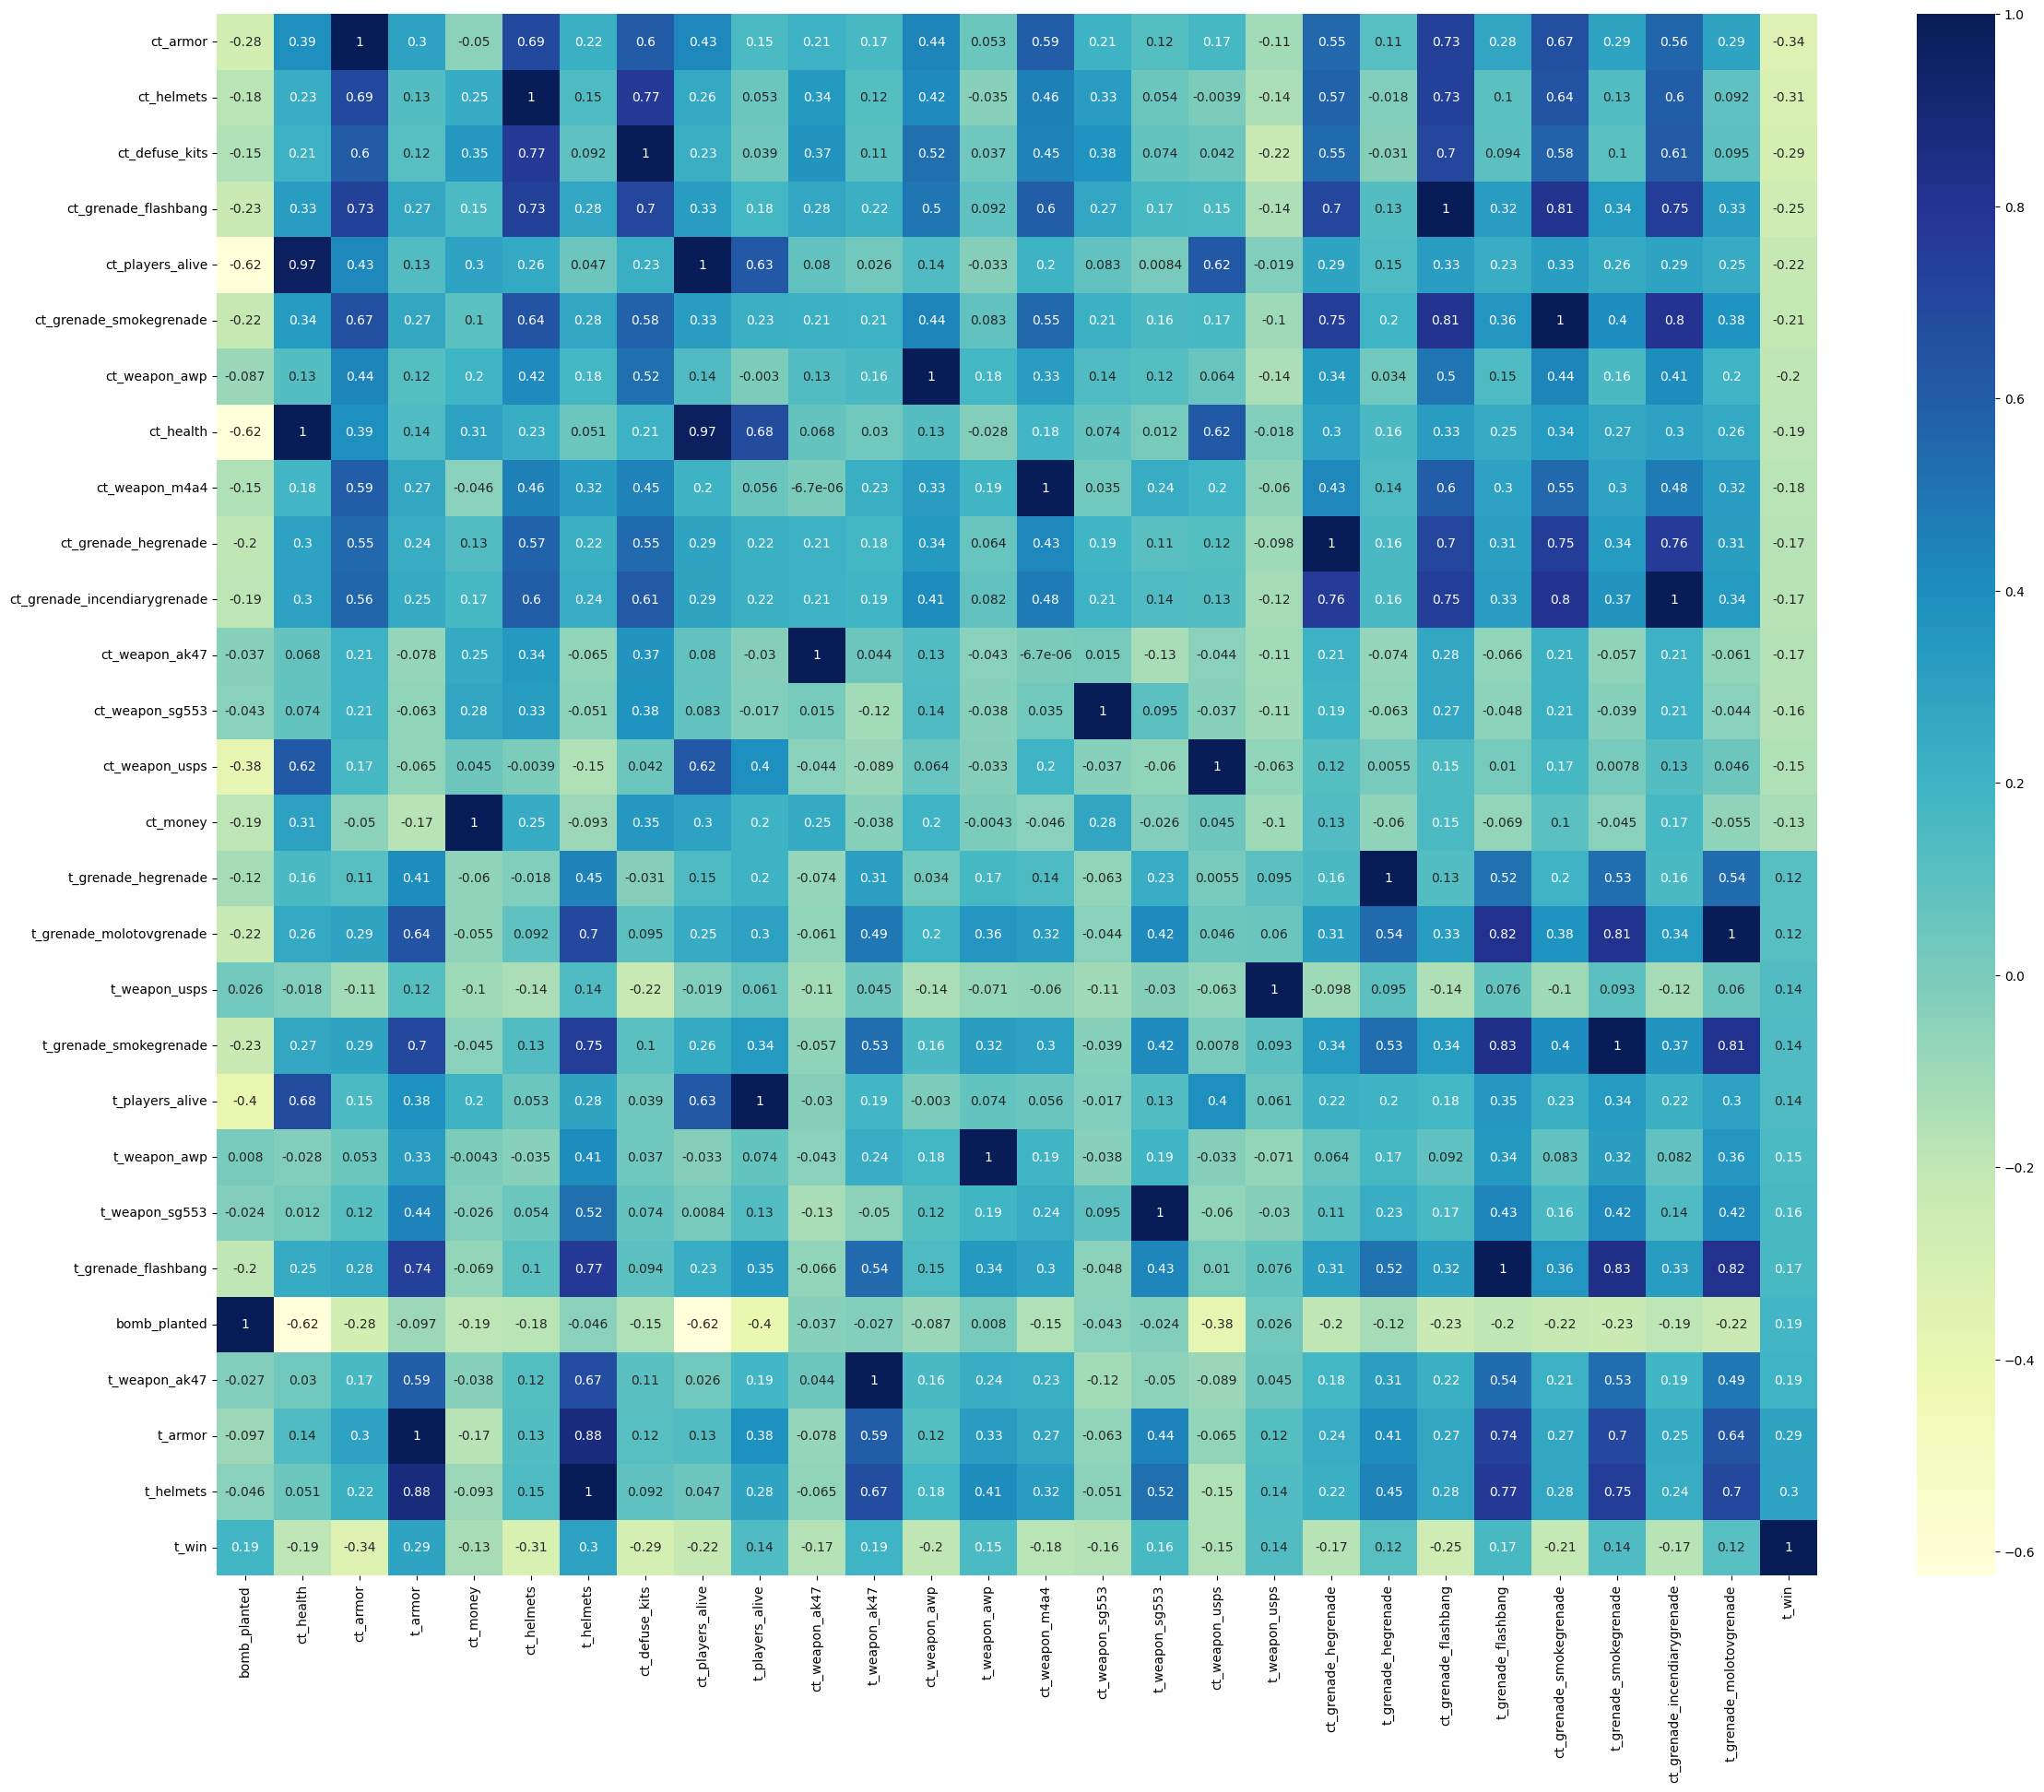

In [28]:
plt.figure(figsize=(28,22))
#making a heatmap using seaborn to visualize correlations
sns.heatmap(df_selected.corr().sort_values(by="t_win"),annot=True, cmap="YlGnBu")

## **Trying KNN on preprocessed data**

In [29]:
#no null values in the data set
#using a scalar
#using knn
from sklearn.model_selection import train_test_split

X,y= df_selected.drop(["t_win"],axis=1),df_selected["t_win"]
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2)

In [30]:
len(X_train)

97928

In [31]:
#scaling data

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [32]:
knn.score(X_test_scaled,y_test)

0.789927293521771

In [33]:
#hyper-parameter tuning best no of neighbors with better scoring and weight methods
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_neighbors": list(range(5,17,2)),
    "weights": ["uniform","distance"]
}

knn = KNeighborsClassifier(n_jobs=-1)

clf= RandomizedSearchCV(knn,param_grid,n_jobs=-1,cv =3)
clf.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']})

In [34]:
knn = clf.best_estimator_
knn.score(X_test_scaled,y_test)

0.808430683767666

## **Working on Random Forest for comparison**

In [35]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_jobs=-1)
forest.fit(X_train_scaled,y_train)
forest.score(X_test_scaled,y_test)

0.8453557715872886

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


#tuning hyperparameters and their corresponding values to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
#n_estimators = 50, max_depth = 10, then n_estimators = 100, max_depth = 10

grid_search = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

accuracy = best_model.score(X_test_scaled, y_test)

print(f"Best Hyperparameters: {best_params}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 84.82%


## **Working on neural network from tensorflow**

In [37]:
#simple feedforward NN with 3 dense layers 200 -100 -100 neurons therefore a sigmoid activation function
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(27,)))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))


In [38]:
X_train

,bomb_planted,ct_health,ct_armor,t_armor,ct_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,...,ct_weapon_usps,t_weapon_usps,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_molotovgrenade
57117,False,500.0,482.0,0.0,28100.0,5.0,0.0,3.0,5.0,5.0,...,2.0,0.0,2.0,0.0,3.0,0.0,3.0,0.0,1.0,0.0
97504,False,493.0,499.0,363.0,4400.0,3.0,4.0,2.0,5.0,4.0,...,5.0,0.0,2.0,0.0,2.0,2.0,1.0,3.0,0.0,0.0
70573,False,500.0,196.0,348.0,12700.0,2.0,4.0,2.0,5.0,5.0,...,4.0,0.0,0.0,2.0,2.0,2.0,0.0,3.0,0.0,3.0
79748,False,214.0,271.0,192.0,14500.0,3.0,2.0,3.0,3.0,2.0,...,2.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0
79659,False,500.0,180.0,373.0,29900.0,2.0,4.0,2.0,5.0,5.0,...,4.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15946,True,200.0,194.0,387.0,15250.0,2.0,3.0,1.0,2.0,4.0,...,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0
34435,False,276.0,300.0,241.0,2300.0,2.0,3.0,2.0,3.0,3.0,...,3.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0
102129,False,366.0,371.0,192.0,12250.0,3.0,2.0,3.0,4.0,2.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
86339,False,144.0,0.0,334.0,3850.0,0.0,4.0,0.0,2.0,4.0,...,2.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,1.0


In [39]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)
X_train_scaled_train,X_valid,y_train_train,y_valid = train_test_split(X_train_scaled,y_train,test_size=0.1)
model.fit(
    X_train_scaled_train,
    y_train_train,
    epochs=30,
    callbacks=[early_stopping_cb],
    validation_data=(X_valid, y_valid)
)

Epoch 1/30
2755/2755 [==============================] - 2s 775us/step - loss: 0.4621 - accuracy: 0.7469 - val_loss: 0.4572 - val_accuracy: 0.7475
Epoch 2/30
2755/2755 [==============================] - 2s 701us/step - loss: 0.4501 - accuracy: 0.7528 - val_loss: 0.4551 - val_accuracy: 0.7507
Epoch 3/30
2755/2755 [==============================] - 2s 714us/step - loss: 0.4452 - accuracy: 0.7557 - val_loss: 0.4497 - val_accuracy: 0.7527
Epoch 4/30
2755/2755 [==============================] - 2s 750us/step - loss: 0.4414 - accuracy: 0.7596 - val_loss: 0.4505 - val_accuracy: 0.7510
Epoch 5/30
2755/2755 [==============================] - 2s 690us/step - loss: 0.4376 - accuracy: 0.7619 - val_loss: 0.4450 - val_accuracy: 0.7576
Epoch 6/30
2755/2755 [==============================] - 2s 709us/step - loss: 0.4344 - accuracy: 0.7640 - val_loss: 0.4502 - val_accuracy: 0.7466
Epoch 7/30
2755/2755 [==============================] - 2s 747us/step - loss: 0.4304 - accuracy: 0.7672 - val_loss: 0.4522 -